<a href="https://colab.research.google.com/github/GianFederico/MD-repo-Computer_Vision/blob/main/K_means_4_color_quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

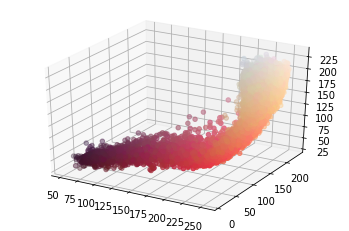

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from PIL import Image

img = Image.open("/content/drive/MyDrive/Colab Notebooks/Computer Vision/assets/skin-compressed.jpg")
img.thumbnail((300,300))
px = img.load()

#generating 3D plot
ax = plt.axes(projection = '3d')
x = []
y = []
z = []
c = []
for row in range(0,img.height):
     for col in range(0, img.width):
         pix = px[col,row]
         newCol = (pix[0] / 255, pix[1] / 255, pix[2] / 255)
         
         if(not newCol in c):
            x.append(pix[0])
            y.append(pix[1])
            z.append(pix[2])
            c.append(newCol)
ax.scatter(x,y,z, c = c)
plt.show()


Number of pixels =  69300
Number of colors =  30514
shape (69300, 3)
centroids shape  (4, 3)
labels shape  (69300,)
X compressed (69300, 3)
reshaped  (231, 300, 3)


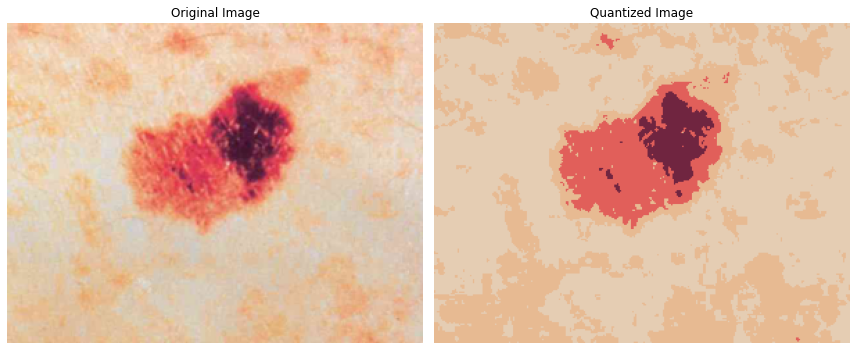

In [2]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

w, h = img.size
colors = img.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

#We transform the image into a numpy array
img = np.asarray(img,dtype=np.float32)/255

# Reshape it to be 2-dimension
X = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
print('shape',X.shape)

# Run the Kmeans algorithm
km = KMeans(n_clusters=4)
km.fit(X)
centroids = km.cluster_centers_
labels = km.labels_
print('centroids shape ', centroids.shape)
print('labels shape ', labels.shape)

# Use the centroids to quantize colors of the image
X_compressed = centroids[labels]
print('X compressed', X_compressed.shape)

X_compressed = X_compressed.reshape(img.shape[0], img.shape[1], img.shape[2])
print('reshaped ', X_compressed.shape)

# Plot the original and the quantized image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Quantized Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

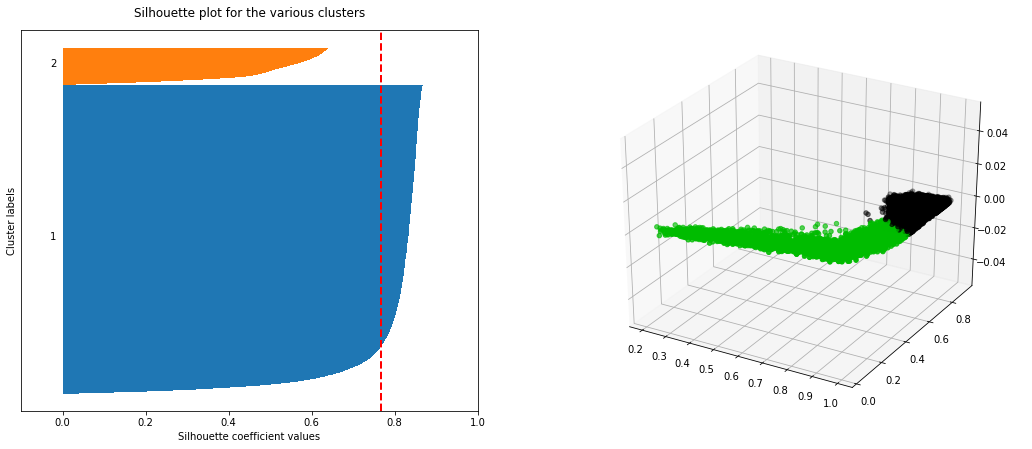

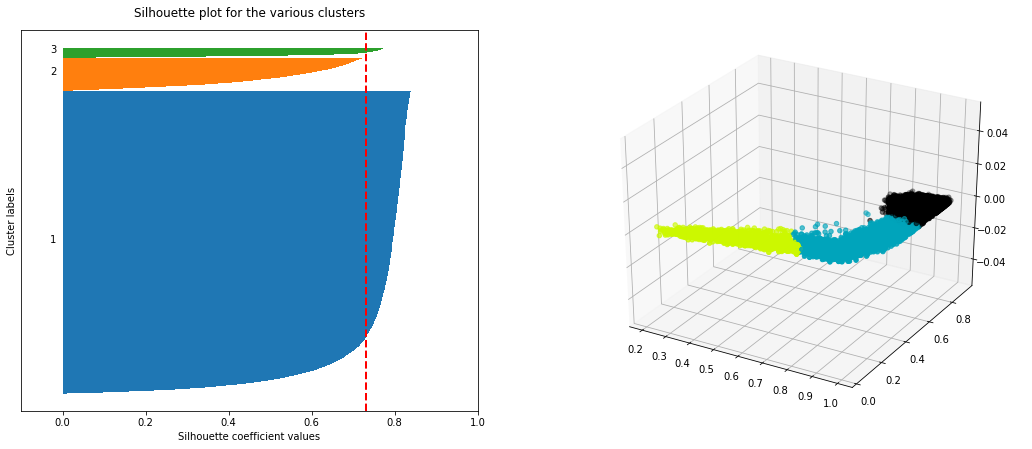

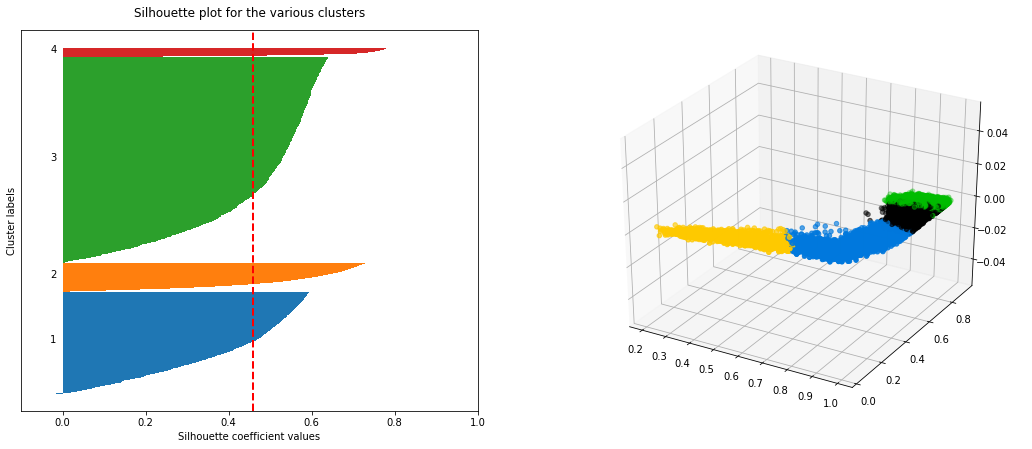

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore') 
#just to hide the warining message between plots (about deprecated use of label parameters of axes)

for i, k in enumerate([2, 3, 4]):
    fig = plt.figure()
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # # Get silhouette samples --- long runtime ---
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        ax1=fig.add_subplot(1,2,1)
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        colors=cm.nipy_spectral(float(i)/k)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='red')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    colors=cm.nipy_spectral(labels.astype(float)/k)
    ax2.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()